### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

### Loading the dataset

In [2]:
df=pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Impute Null Values

In [5]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='most_frequent') 
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [6]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   object
 1   Attendance                  6607 non-null   object
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   object
 6   Previous_Scores             6607 non-null   object
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   object
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Encoding Caegorical Values

In [7]:
from sklearn.calibration import LabelEncoder
'''Convert Categorical Variables into Numbers using the Label Encoder method.'''

label_encoders = {} 
for column in df_imputed.select_dtypes(include='object').columns: 
    le = LabelEncoder() 
    df_imputed[column] = le.fit_transform(df_imputed[column]) 
    label_encoders[column] = le

In [8]:
df_imputed.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,22,24,1,0,0,3,23,1,1,0,1,2,1,2,3,0,1,2,1,12
1,18,4,1,2,0,4,9,1,1,2,2,2,1,0,4,0,0,1,0,6
2,23,38,2,2,1,3,41,2,1,2,2,2,1,1,4,0,2,2,1,19
3,28,29,1,2,1,4,48,2,1,1,2,2,1,0,4,0,1,1,1,16
4,18,32,2,2,1,2,15,2,1,3,2,0,1,1,4,0,0,2,0,15


In [9]:
df_imputed[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Physical_Activity','Exam_Score']].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000
mean,18.974421,19.977448,3.02906,25.070531,2.967610,12.225821
std,5.987254,11.547475,1.46812,14.399784,1.031231,3.828227
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,15.000000,10.000000,2.00000,13.000000,2.000000,10.000000
50%,19.000000,20.000000,3.00000,25.000000,3.000000,12.000000
75%,23.000000,30.000000,4.00000,38.000000,4.000000,14.000000
max,40.000000,40.000000,6.00000,50.000000,6.000000,44.000000


### Normalization of Feature Data

In [10]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler() 
x_scaled = scaler.fit_transform(df_imputed.drop('Exam_Score', axis=1))

In [11]:
x_scaled = pd.DataFrame(x_scaled, columns=df_imputed.drop('Exam_Score', axis=1).columns)
x_scaled[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Physical_Activity']].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Physical_Activity
count,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03
mean,2.365966e-16,1.021667e-17,8.818602e-17,-4.301757e-17,-1.720703e-17
std,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00
min,-3.169376e+00,-1.730158e+00,-2.063380e+00,-1.741167e+00,-2.877953e+00
25%,-6.638639e-01,-8.641026e-01,-7.009903e-01,-8.383073e-01,-9.383768e-01
50%,4.272554e-03,1.953115e-03,-1.979558e-02,-4.898448e-03,3.141133e-02
75%,6.724090e-01,8.680088e-01,6.613991e-01,8.979612e-01,1.001199e+00
max,3.511989e+00,1.734065e+00,2.023788e+00,1.731370e+00,2.940776e+00


### Simple Random Sampling

In [12]:
from datetime import datetime
import random
from sklearn.utils import resample


# df_srs1=resample(df_imputed,replace=True,n_samples=660,random_state=int(datetime.now().timestamp()%1000))
df_srs1=resample(df_imputed,replace=True,n_samples=660,random_state=random.randint(1,1000))
df_srs1[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Physical_Activity','Exam_Score']].describe()   


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Physical_Activity,Exam_Score
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,18.989394,19.936364,2.959091,24.550000,2.992424,12.171212
std,5.827688,11.713275,1.412010,14.311267,1.066074,3.718806
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,15.000000,9.000000,2.000000,13.000000,2.000000,10.000000
50%,19.000000,21.000000,3.000000,25.000000,3.000000,12.000000
75%,23.000000,30.000000,4.000000,37.000000,4.000000,14.000000
max,38.000000,40.000000,6.000000,50.000000,6.000000,40.000000


In [13]:
df_srs2=resample(df_imputed,replace=True,n_samples=660,random_state=random.randint(1,1000))
# df_srs2=resample(df_imputed,replace=True,n_samples=660,random_state= int(datetime.now().timestamp()%1000))##seed value
df_srs2[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Physical_Activity','Exam_Score']].describe()  

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Physical_Activity,Exam_Score
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,18.772727,20.134848,3.100000,24.589394,2.942424,12.215152
std,6.052616,11.543873,1.526399,14.195883,1.050913,3.923674
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,15.000000,10.000000,2.000000,12.000000,2.000000,10.000000
50%,19.000000,20.000000,3.000000,24.000000,3.000000,12.000000
75%,23.000000,30.000000,4.000000,37.000000,4.000000,14.250000
max,37.000000,40.000000,6.000000,50.000000,6.000000,41.000000


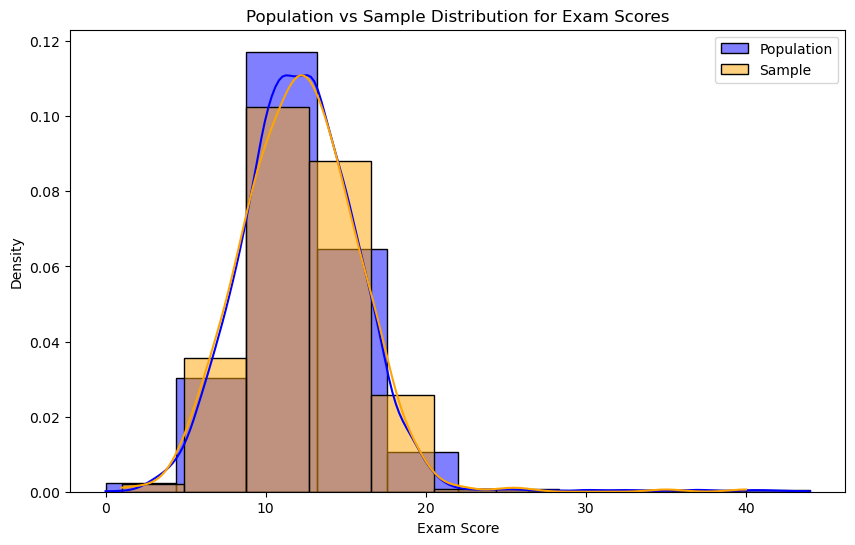

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the population distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_imputed['Exam_Score'], label='Population', kde=True, color='blue', stat='density',bins=10)

# Plot the sample distribution
sns.histplot(df_srs1['Exam_Score'], label='Sample', kde=True, color='orange', stat='density',bins=10)

# Add title and labels
plt.title('Population vs Sample Distribution for Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()


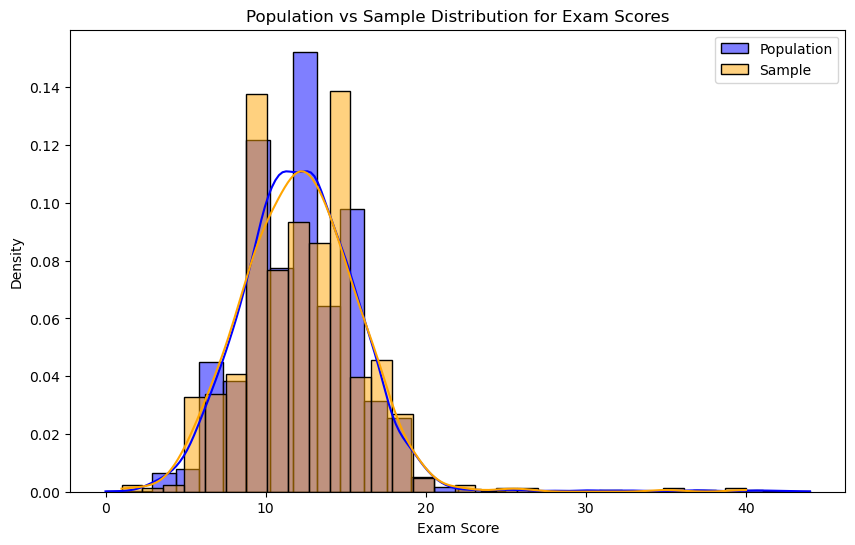

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the population distribution with more bins
plt.figure(figsize=(10, 6))
sns.histplot(df_imputed['Exam_Score'], label='Population',kde=True, color='blue', stat='density', bins=30)

# Plot the sample distribution with more bins
sns.histplot(df_srs1['Exam_Score'], label='Sample',kde=True,  color='orange', stat='density', bins=30)

# Add title and labels
plt.title('Population vs Sample Distribution for Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()


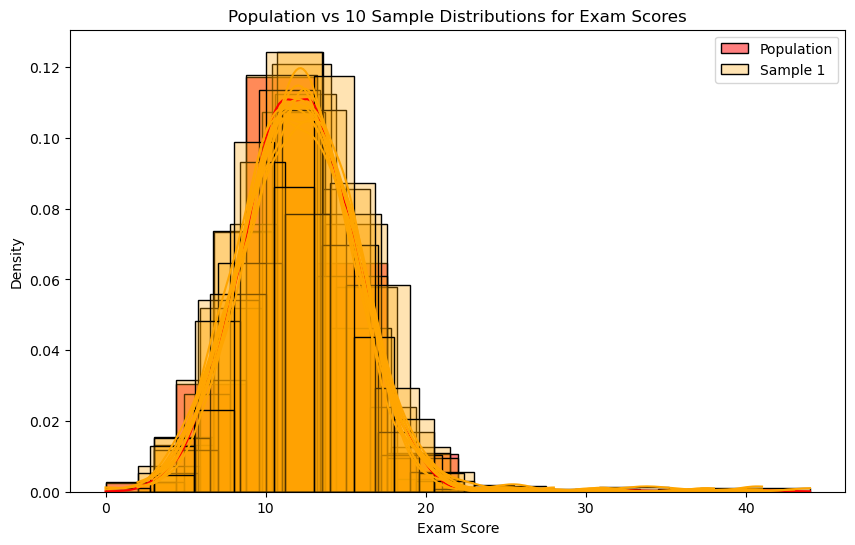

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import random

# Set figure size
plt.figure(figsize=(10, 6))

# Plot the population distribution
sns.histplot(df_imputed['Exam_Score'], label='Population', kde=True, color='red', stat='density', bins=10)

# Perform sampling 10 times and plot the sample distributions
for i in range(10):
    df_srs = resample(df_imputed, replace=True, n_samples=660, random_state=random.randint(1, 1000))
    sns.histplot(df_srs['Exam_Score'], kde=True, stat='density', bins=10, color='orange', alpha=0.3, label=f'Sample {i+1}' if i == 0 else "") 

# Add title and labels
plt.title('Population vs 10 Sample Distributions for Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Density')

# Add legend (showing only for the first sample to avoid clutter)
plt.legend()

# Show the plot
plt.show()


### Systematic Sampling

In [17]:
from sklearn.model_selection import KFold
import pandas as pd

def systematic_sampling_sklearn(df, n_samples):
    population_size = len(df)
    interval = population_size // n_samples
    
    # Create KFold with n_splits = interval size
    kf = KFold(n_splits=interval,random_state=random.randint(1,1000), shuffle=True)
    
    # We only need the first fold
    for train_index, sample_index in kf.split(df):
        return df.iloc[sample_index]



In [18]:
# Perform systematic sampling for 660 samples using sklearn
df_sys_sample_sklearn = systematic_sampling_sklearn(df_imputed, 660)

# Display the systematic sample
# print(df_sys_sample_sklearn)
df_sys_sample_sklearn[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Physical_Activity','Exam_Score']].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Physical_Activity,Exam_Score
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,19.078669,20.677761,3.027231,24.570348,2.948563,12.313162
std,5.938053,11.471332,1.466551,14.426301,1.043197,3.536857
min,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,15.000000,11.000000,2.000000,12.000000,2.000000,10.000000
50%,19.000000,20.000000,3.000000,24.000000,3.000000,12.000000
75%,23.000000,31.000000,4.000000,37.000000,4.000000,15.000000
max,34.000000,40.000000,6.000000,50.000000,6.000000,32.000000


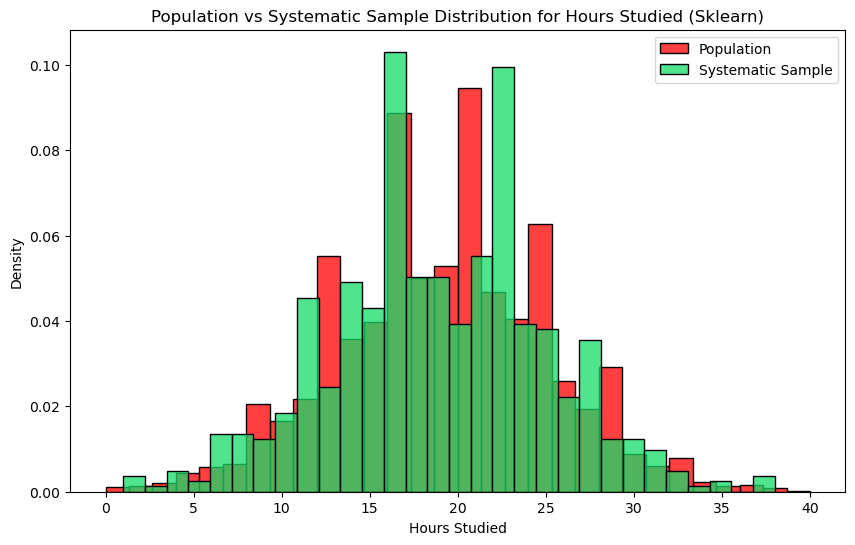

In [19]:

# Plot the population and systematic sample distribution
import matplotlib.pyplot as plt
import seaborn as sns

df_sys_sample_sklearn = systematic_sampling_sklearn(df_imputed, 660)

# Set figure size
plt.figure(figsize=(10, 6))

# Plot the population distribution
sns.histplot(df_imputed['Hours_Studied'], label='Population', color='red', stat='density', bins=30)

# Plot the systematic sample distribution
sns.histplot(df_sys_sample_sklearn['Hours_Studied'], label='Systematic Sample', color='#16db68', stat='density', bins=30)

# Add title and labels
plt.title('Population vs Systematic Sample Distribution for Hours Studied (Sklearn)')
plt.xlabel('Hours Studied')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()

### Stratified Random Sampling

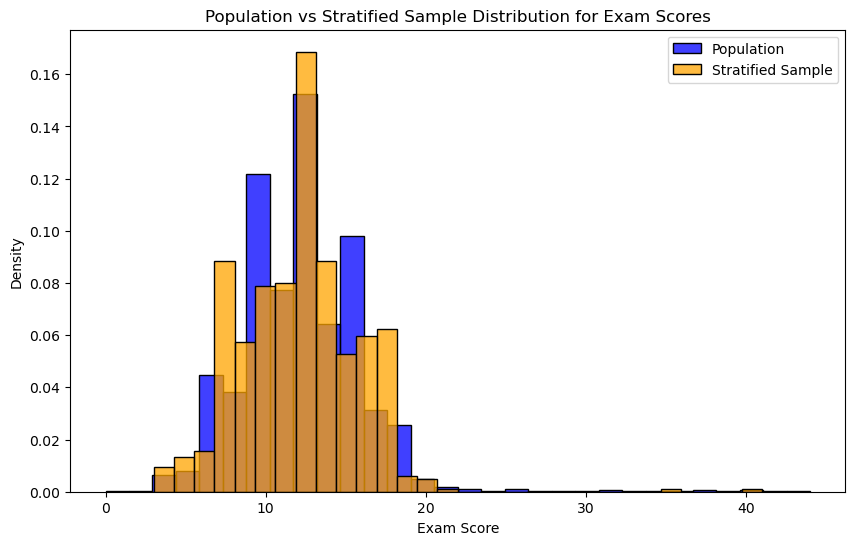

In [20]:
from sklearn.model_selection import train_test_split

# Example: Assuming 'df_imputed' is the DataFrame, and we stratify based on 'Category_Column'
# This column represents the "strata" that you want to preserve proportions of in the sample

# Perform stratified sampling
df_strat_sample, _ = train_test_split(df_imputed, test_size=0.9, stratify=df_imputed['Access_to_Resources'], random_state=random.randint(1,1000))

# Display the stratified sample
# print(df_strat_sample)
df_strat_sample[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Physical_Activity','Exam_Score']].describe()

# Plot population vs stratified sample distribution for comparison (example with 'Exam_Score')
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the population distribution
sns.histplot(df_imputed['Exam_Score'], label='Population', color='blue', stat='density', bins=30)

# Plot the stratified sample distribution
sns.histplot(df_strat_sample['Exam_Score'], label='Stratified Sample', color='orange', stat='density', bins=30)

# Add title and labels
plt.title('Population vs Stratified Sample Distribution for Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()


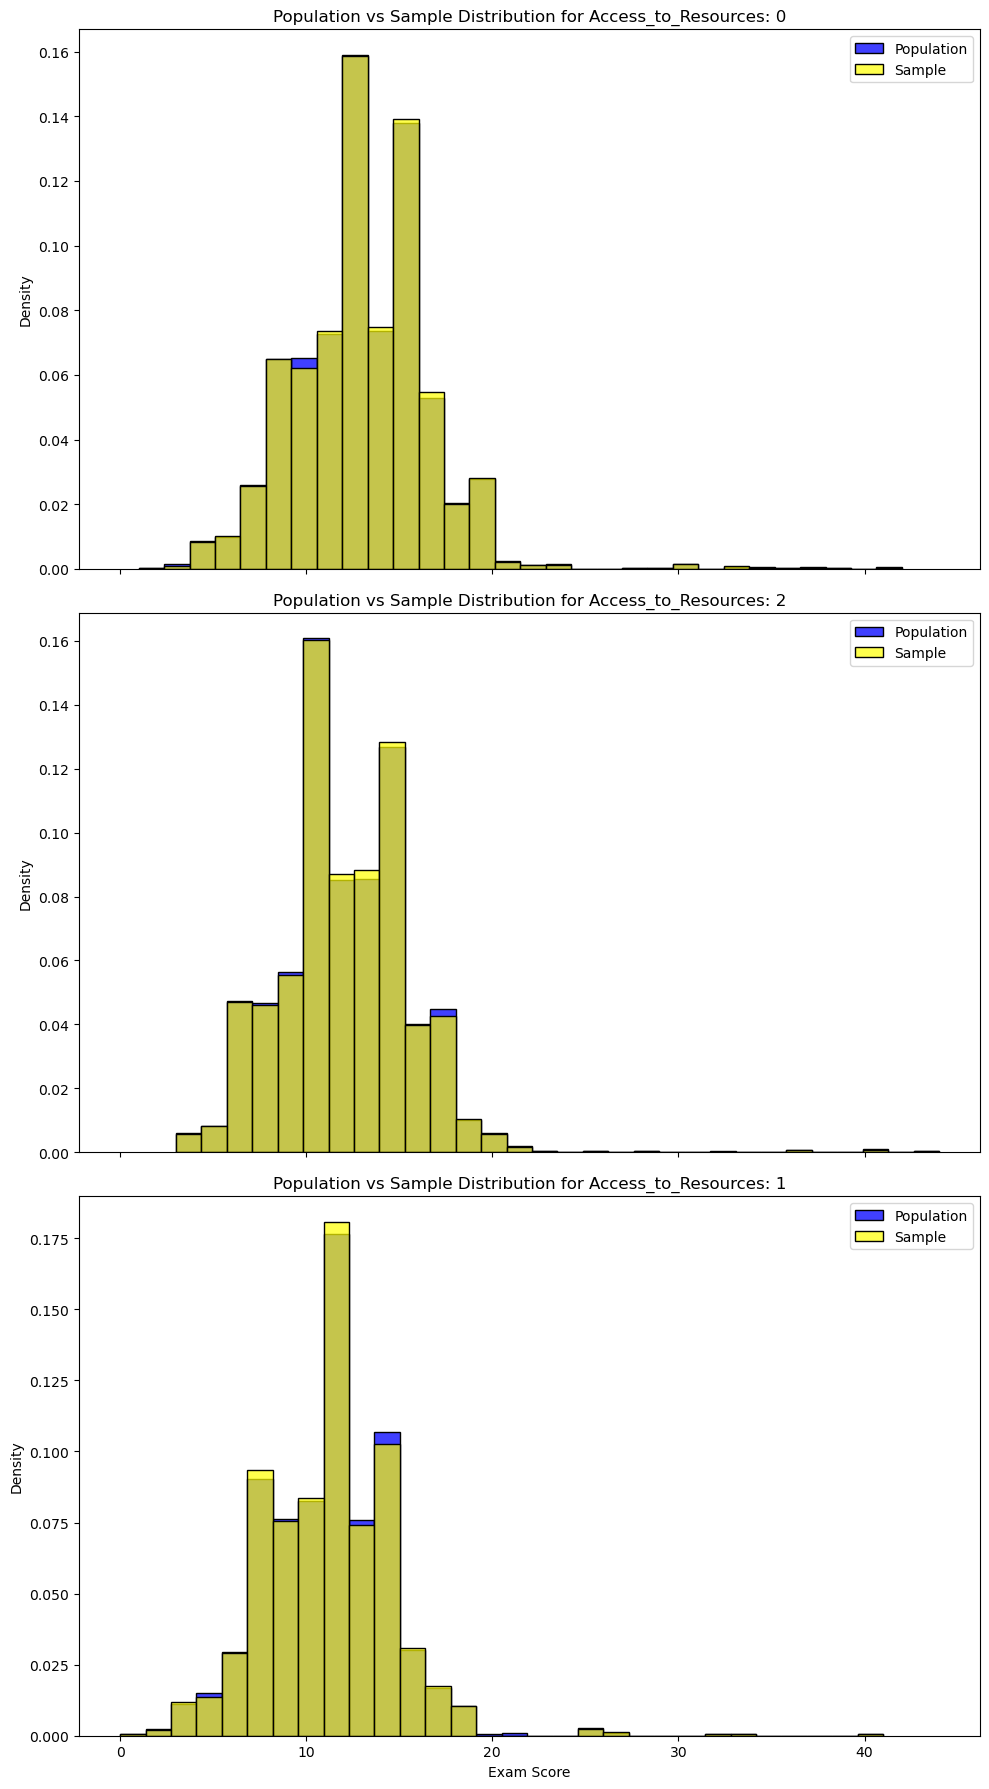

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assume df_imputed is the DataFrame and 'Category_Column' is the column for stratified sampling
# We'll use 'Exam_Score' as the numerical variable for plotting distributions.

# Perform stratified sampling
df_strat_sample, _ = train_test_split(df_imputed, test_size=0.1, stratify=df_imputed['Access_to_Resources'], random_state=random.randint(1,1000))

# List of unique categories in 'Category_Column'
categories = df_imputed['Access_to_Resources'].unique()

# Create subplots
fig, axes = plt.subplots(len(categories), 1, figsize=(10, 6 * len(categories)), sharex=True)

# If only one category, axes won't be an array, so we convert it to one for consistent indexing
if len(categories) == 1:
    axes = [axes]

# Loop through each category and plot population vs sample distribution
for i, category in enumerate(categories):
    # Filter data for the current category
    population_category = df_imputed[df_imputed['Access_to_Resources'] == category]
    sample_category = df_strat_sample[df_strat_sample['Access_to_Resources'] == category]
    
    # Plot population density
    sns.histplot(population_category['Exam_Score'], label='Population', color='blue', stat='density', bins=30, ax=axes[i])
    
    # Plot sample density
    sns.histplot(sample_category['Exam_Score'], label='Sample', color='yellow', stat='density', bins=30, ax=axes[i], alpha=0.7)
    
    # Add title and labels for each subplot
    axes[i].set_title(f'Population vs Sample Distribution for Access_to_Resources: {category}')
    axes[i].set_xlabel('Exam Score')
    axes[i].set_ylabel('Density')
    
    # Add legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Cluster Sampling

       Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
count     695.000000  695.000000   695.000000       695.000000   
mean       18.723741   19.228777     3.094964        25.366906   
std         5.781188   11.527853     1.491442        14.185242   
min         3.000000    0.000000     0.000000         0.000000   
25%        15.000000    9.000000     2.000000        14.000000   
50%        19.000000   19.000000     3.000000        26.000000   
75%        23.000000   29.000000     4.000000        38.000000   
max        34.000000   40.000000     6.000000        50.000000   

       Physical_Activity  Exam_Score  
count         695.000000  695.000000  
mean            3.007194   11.260432  
std             1.070272    4.018664  
min             0.000000    2.000000  
25%             2.000000    9.000000  
50%             3.000000   11.000000  
75%             4.000000   13.000000  
max             6.000000   33.000000  


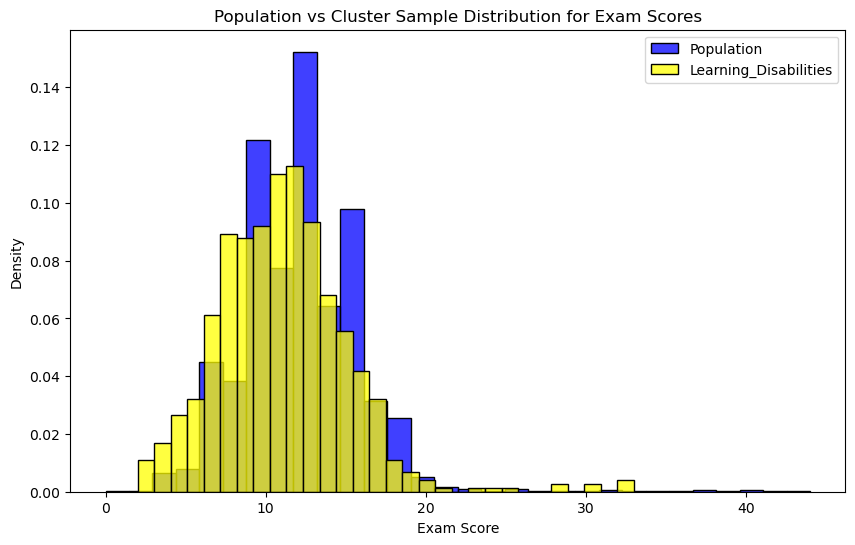

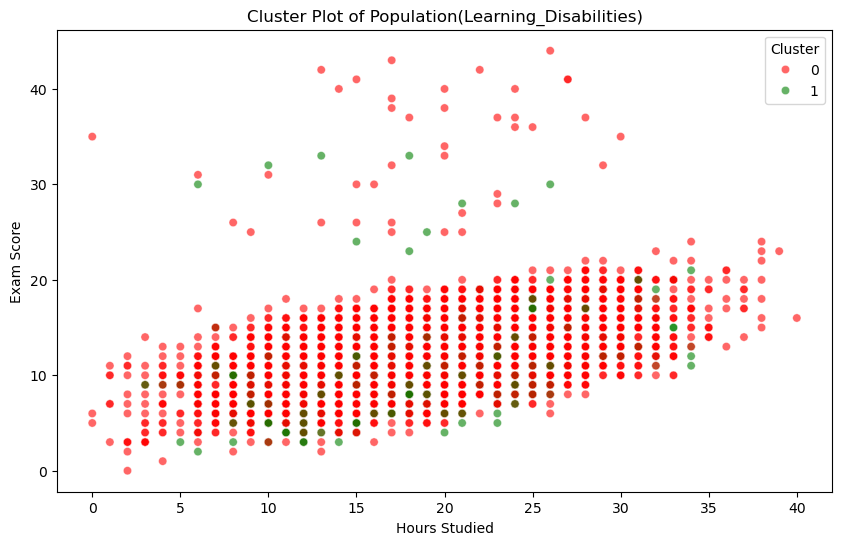

In [22]:
np.random.seed(random.randint(1,1000))


# Step 1: Divide the population into clusters
clusters = df_imputed['Learning_Disabilities'].unique()

# Step 2: Randomly select clusters
num_clusters_to_sample = 1  # Choose the number of clusters to sample
selected_clusters = random.sample(list(clusters), num_clusters_to_sample)

# Step 3: Sample from the selected clusters
df_cluster_sample = df_imputed[df_imputed['Learning_Disabilities'].isin(selected_clusters)]

# Display the sampled data description
print(df_cluster_sample[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Physical_Activity','Exam_Score']].describe())

# Step 4: Plot population vs cluster sample distribution for comparison (example with 'Exam_Score')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the population distribution
sns.histplot(df_imputed['Exam_Score'], label='Population', color='blue', stat='density', bins=30)

# Plot the cluster sample distribution
sns.histplot(df_cluster_sample['Exam_Score'], label='Learning_Disabilities', color='yellow', stat='density', bins=30)

# Add title and labels
plt.title('Population vs Cluster Sample Distribution for Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Optional: Plot a cluster plot (scatter plot) to visualize the clusters
customPalette={0: "red", 1: "green", 2: "orange"}
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_imputed, x='Hours_Studied', y='Exam_Score', hue='Learning_Disabilities',palette=customPalette ,alpha=0.6)
plt.title('Cluster Plot of Population(Learning_Disabilities)')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend(title='Cluster')
plt.show()


       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    5302.000000  5302.000000  5302.000000      5302.000000   
mean       18.976990    19.831007     3.025839        25.068088   
std         5.993948    11.555878     1.476181        14.376709   
min         0.000000     0.000000     0.000000         0.000000   
25%        15.000000    10.000000     2.000000        13.000000   
50%        19.000000    19.000000     3.000000        25.000000   
75%        23.000000    30.000000     4.000000        37.000000   
max        40.000000    40.000000     6.000000        50.000000   

       Physical_Activity   Exam_Score  
count        5302.000000  5302.000000  
mean            2.980762    12.044700  
std             1.023589     3.854367  
min             0.000000     0.000000  
25%             2.000000    10.000000  
50%             3.000000    12.000000  
75%             4.000000    14.000000  
max             6.000000    44.000000  


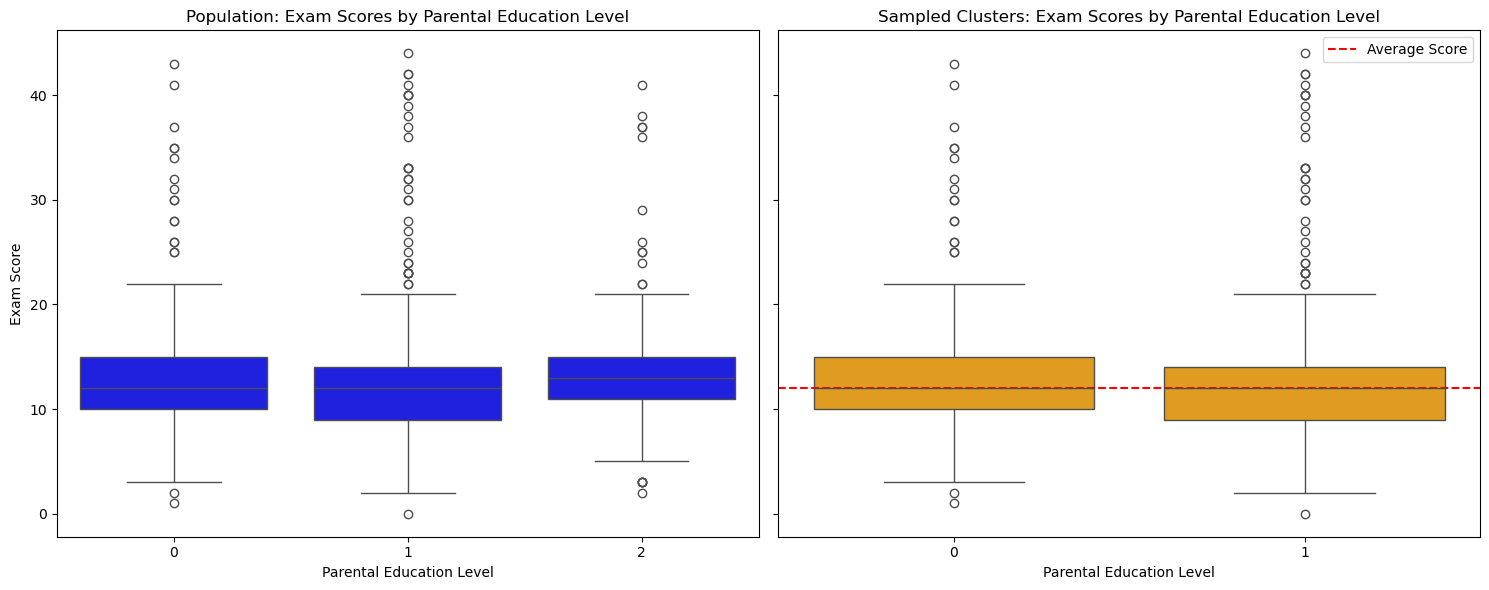

In [30]:
# import random
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# Step 1: Set seed for reproducibility
np.random.seed(random.randint(1, 1000))

# Step 2: Divide the population into clusters
clusters = df_imputed['Parental_Education_Level'].unique()

# Step 3: Randomly select clusters
num_clusters_to_sample = 2  # Choose the number of clusters to sample
selected_clusters = random.sample(list(clusters), num_clusters_to_sample)

# Step 4: Sample from the selected clusters
df_cluster_sample = df_imputed[df_imputed['Parental_Education_Level'].isin(selected_clusters)]

# Display the sampled data description
print(df_cluster_sample[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Physical_Activity', 'Exam_Score']].describe())

# Step 5: Plot population vs cluster sample distribution for comparison

# Set the figure size
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot satisfaction scores for all clusters (Population)
sns.boxplot(data=df_imputed, x='Parental_Education_Level', y='Exam_Score', ax=axes[0], color='blue')
axes[0].set_title("Population: Exam Scores by Parental Education Level")
axes[0].set_xlabel("Parental Education Level")
axes[0].set_ylabel("Exam Score")

# Plot satisfaction scores for the selected clusters (Sample)
sns.boxplot(data=df_cluster_sample, x='Parental_Education_Level', y='Exam_Score', ax=axes[1], color='orange')
axes[1].set_title("Sampled Clusters: Exam Scores by Parental Education Level")
axes[1].set_xlabel("Parental Education Level")

# Add a horizontal line showing the average satisfaction score from the sampled clusters
average_exam_score = df_cluster_sample['Exam_Score'].mean()
axes[1].axhline(average_exam_score, color='red', linestyle='--', label='Average Score')
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
